# Аналитический  проект : 

# Проверка гипотезы о длительности использования приложения Яндекс.Книги в г.Москва и г.Санкт-Петербург. 

## Цель проекта

заключатся в проведении проверки гипотезы о том, что пользователи из Санкт-Петербурга в среднем проводят больше времени за чтением и прослушивание книг в приложении по сравнению с жителями города Москвы. Для проверки будут использоваться различные инструменты, в частности статистически тест, который позволит определить существует ли статистическая значимость различий между средним временем нахождения пользователей в приложении из двух городов.

## Задачи исследования:
- загрузка и знакомство с данными из `yandex_knigi_data`
- проведение предобработки данных по необходимости ( изменение типов данных, обработка дубликатов и пропусков);
- проверка гипотезы о наличии статистически значимых различиях количества часов активности в приложении Яндекс. Книги пользователей;
- составление аналитической записки и приведение выводов о проделанной работе.


## Содержимое проекта:

1. Загрузка данных и знакомство с ними:
- проводится предварительное знакомство с данными;
- провести исследование данных и необходимую обработку.

2. Проверка гипотезы:
- формирование 2х выборок в зависимости от города: Москва и Санкт - Петербург;
- проверка выборок на нормальность распределения используя тест Колмогорова - Смирнова;
- проведения статистического-тестирования в зависимости от результатов теста Колмогорова - Смирнова.

3. Формирование аналитической записки по результатам работы



## Описание данных:

Таблица `yandex_knigi_data` - отражены данные о количестве часов активности жителей Москвы и Санкт-Петербурга:
 - `city` - наименование городов;
 - `puid` - идентификатор пользователя;
 - `hours`- длительность чтения или прослушивания в часах
 

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
import math
from math import ceil

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import numpy as np
import pandas as pd
import seaborn as sns


from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import kstest
import statsmodels.stats.api as sms
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportions_ztest

In [2]:
try: 
    yandex_knigi_data = pd.read_csv('C:/Users/Ирэн/Documents/Обучение/Data Analis_Яндекс_Практикум/Дата_сеты/Итоговый_проект_3/yandex_knigi_data.csv', sep = ',')
except FileNotFoundError:
    yandex_knigi_data = pd.read_csv('/datasets/yandex_knigi_data.csv', sep = ',')

In [3]:
yandex_knigi_data.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [4]:
yandex_knigi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


In [5]:
yandex_knigi_dt = yandex_knigi_data.drop(columns=['Unnamed: 0'])

Датасет `yandex_knigi_data` состоит из 4 колонок и 8784 строки, здесь отражены данные о пользователях в городе Санкт-Петербург и Москва и активность использования приложения. 

В данных нет пропусков, тип данных соответствует информации отраженной в датасете, поэтому обрабатывать не надо. При этом мы удалили столбец  `0 Unnamed`, который не имеет какого-либо информативности.

Поэтому, проведем исследование на наличие явных и неявных дубликатов в датасете.

In [6]:
yandex_knigi_dt.head()

,city,puid,hours
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434


In [7]:
duplicates_count = yandex_knigi_dt.duplicated().sum()
print(f"Количество явных дубликатов: {duplicates_count}")

Количество явных дубликатов: 0



Далее проверим, есть ли дубликаты в столбце` puid`, так как есть риск, что одни и те же пользователи могли использовать приложение из разных городов и так далее. 


In [8]:
print ('Дубликтов по puid:')
print(yandex_knigi_dt.duplicated(subset='puid',).sum())

Дубликтов по puid:
244


Дубликаты есть в `puid`, которые целесообразно удалить, так как их не так много, а качеству исследования они могут мешать для дальнейшего проведения статистического исследования.

In [9]:
yandex_knigi_df = yandex_knigi_dt.drop_duplicates(subset=['puid'],keep = False).reset_index(drop=True)

In [10]:
yandex_knigi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8296 non-null   object 
 1   puid    8296 non-null   int64  
 2   hours   8296 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 194.6+ KB


In [11]:
print ('Дубликтов по puid:')
print(yandex_knigi_df.duplicated(subset='puid',).sum())

Дубликтов по puid:
0


Таким образом, мы провели предобработку данных и сформировали общий датасет, на основании которого в дальнейшем нам необходимо провести исследование только являются ли пользователи из Санкт-Петербурга более активными пользователями или нет по сравнению с жителями Москвы.

## 2. Проверка гипотезы в Python

Общая гипотеза проекта такая: `пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.` 

Нам необходимо подтвердить или опровергнуть данную гипотезу и для этого будем использовать такой метод как статистический тест. Таким образом, нулевая и альтернативная гипотеза звучат так:


- **Нулевая гипотеза H₀**: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- **Альтернативная гипотеза H₁**: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.


In [12]:
df_st_peterburg = yandex_knigi_df[yandex_knigi_df['city'] =='Санкт-Петербург']
df_moscow = yandex_knigi_df[yandex_knigi_df['city'] =='Москва']

In [13]:
print(f'Размер выборки данных по городу Москва:{len(df_moscow)}')
print(f'Размер выборки данных по городу Санкт - Петербург: {len(df_st_peterburg)}')

Размер выборки данных по городу Москва:5990
Размер выборки данных по городу Санкт - Петербург: 2306


Нам очень важно, чтобы выборки были независимыми, репрезентативными, в связи с этим нужно провести оценку независимости выборок по средствам наличия пересечений между пользователями.

In [14]:
df_st_peterburg_set = set(df_st_peterburg['puid'].unique())
df_moscow_set = set(df_moscow['puid'].unique())

intersection_users = df_st_peterburg_set.intersection(df_moscow_set)

if intersection_users:
    print(f"Пользователи, попавшие в обе группы: {list(intersection_users)}")
else:
    print("Никаких пользователей, встречающихся в обеих группах, не обнаружено.")


Никаких пользователей, встречающихся в обеих группах, не обнаружено.


Как видно из данных размер выборки не равномерен между данными для Москвы и для Санкт - Петербурга. При этом для проведения оценки гипотезы нам важно являются ли данные нормально распределенными или нет в выборке, так как от этого будет зависеть какой тест для оценки выбрать.

Поэтому, для начала построим графики, которые позволят увидеть, как распределены данные в выборках и также мы можем провести тест Колмогорова – Смирнова для подтверждения результатов.


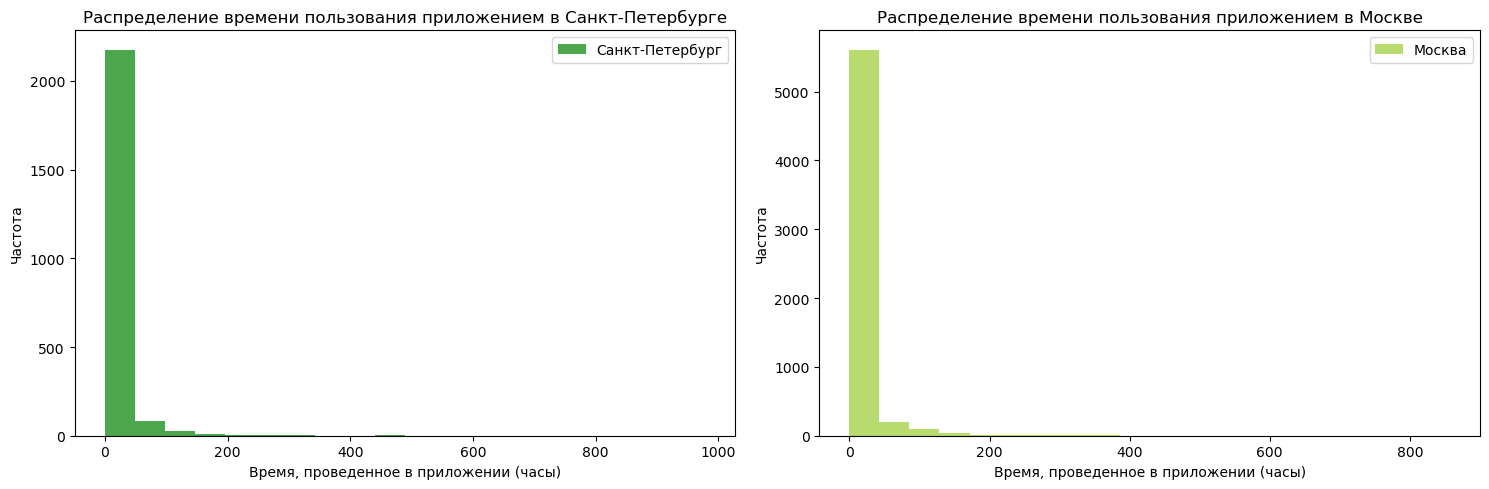

In [15]:
# Создаем фигуру и оси для двух подграфиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Подграфик для Санкт-Петербурга
ax1.hist(df_st_peterburg['hours'], bins=20, color='green', alpha=0.7, label='Санкт-Петербург')
ax1.set_xlabel('Время, проведенное в приложении (часы)')
ax1.set_ylabel('Частота')
ax1.set_title('Распределение времени пользования приложением в Санкт-Петербурге')
ax1.legend()

# Подграфик для Москвы
ax2.hist(df_moscow['hours'], bins=20, color='yellowgreen', alpha=0.7, label='Москва')
ax2.set_xlabel('Время, проведенное в приложении (часы)')
ax2.set_ylabel('Частота')
ax2.set_title('Распределение времени пользования приложением в Москве')
ax2.legend()

# Отображаем графику
plt.tight_layout()  # Уменьшаем пустое пространство между подграфиками
plt.show()

Данные не имеют нормального распределения, так как основная часть сосредоточена между 0 и 50, а также есть «хвост" в данных. Однако, для получения еще более точного подтверждения о качестве распределения данных проведем тест Колмогорова – Смирнова.

In [16]:
def check_test(data,alpha):
    stat, p_value = kstest(data, 'norm')
    if p_value > alpha:
        print("Данные соответствуют нормальному распределению")
    else:
        print("Данные не соответствуют нормальному распределению")

In [17]:
#Проводим оценку данных по городу Санкт-Петербур.
check_test_sp = check_test(df_st_peterburg['hours'],0.05)

Данные не соответствуют нормальному распределению


In [18]:
#Проводим оценку данных для города Москва. 
check_test_msc = check_test(df_moscow['hours'],0.05)

Данные не соответствуют нормальному распределению


Так как представленные данные не подчиняются нормальному распределению, для проверки гипотезы предпочтительно использовать непараметрические тесты, не зависящие от формы распределения.

Одним из наиболее подходящих тестов в данном случае является `Тест Манна-Уитни (Mann–Whitney U test)`. Данный метод предназначен для сравнения двух независимых выборок и работает даже тогда, когда нормальное распределение отсутствует.

Установленный нами уровень значимости `(α) составит 0,05`, что считается стандартным значением для большинства исследований и позволяет надежно оценивать разницу между группами.

В рамках данного проекта нам необходимо исследовать гипотезу, которая звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- `Нулевая гипотеза H₀`: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.
- `Альтернативная гипотеза H₁`: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [19]:
#сформируем выборки 
df_st_peterburg_hour = df_st_peterburg['hours']
df_moscow_hour = df_moscow['hours']

# Тест Манна-Уитни с односторонней гипотезой (альтернатива 'greater')
mw_test = mannwhitneyu(df_st_peterburg_hour, df_moscow_hour, alternative='greater')

#статестический уровень значимости
alpha = 0.05

if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue:.4f} > {alpha}')
    print('Нулевая гипотеза подтверждается.\nСредняя активность пользователей в часах в Москве и Санкт-Петербурге не различается')
else:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Принимаем альтернативную гипотезу.\nСредняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо')

pvalue=0.4532 > 0.05
Нулевая гипотеза подтверждается.
Средняя активность пользователей в часах в Москве и Санкт-Петербурге не различается


## 3. Аналитическая записка по результатам по оценке гипотезы

Нами была проведено исследование продолжительности активности использования приложения Яндекс.Книги в разрезе 2х городов Санкт-Петербург и Москва.  

Гипотеза исследования: Средняя продолжительность активности пользователей в Санкт-Петербурге выше, чем в Москве.

- Характеристика выборок:Данные из таблицы `yandex_knigi_data` были разделены на две независимые выборки по признаку `city`. Размер выборок оказался различным, но они не пересекаются, что обеспечивает чистоту эксперимента;
- Нормальность распределения: Согласно критерию `Колмогорова-Смирнова`, данные в выборках не подчиняются нормальному распределению;
- Результат `теста Манна-Уитни` показал, что `p-value  = 0,453`, что больше показателя уровня статистической значимости  0,05. Это означает, что мы не можем отвергнуть нулевую гипотезу, согласно которой средняя активность пользователей в часах в Москве и Санкт-Петербурге не различается;
- практические рекомендации: для дальнейшего исследования стоит сосредоточиться на других характеристиках пользователей и сравнить их поведение в разных регионах. Это поможет выявить реальные причины различий и выработать конкретные рекомендации по развитию приложения.

Таким образом, наше исследование показало, что на данный момент значительных различий в уровне активности пользователей Яндекс.Книг между Москвой и Санкт-Петербургом не обнаружено.